このSprintでは機械学習手法のスクラッチ課題に取り組む準備を行います。scikit-learnを用いて分類・回帰問題を解くコードを書いておき、今後のSprintではそれと同じ動作をするクラスをスクラッチで作成していきます。

#### スクラッチの意義
ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。

スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。

以下のような効果を狙っています。

- 新たな手法に出会った時に理論・数式を理解しやすくする
- ライブラリを使う上での曖昧さを減らす
- 既存の実装を読みやすくする

### 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。
```
def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く
    pass
    return X_train, X_test, y_train, y_test
```

In [1]:
import numpy as np
import pandas as pd

def scratch_train_test_split(X, y, train_size=0.8, random_state=None):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定
    random_state : int
      ランダムシードの作成

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    # チェック
    if not (type(X) == np.ndarray or type(X) == pd.DataFrame) or \
       not (type(y) == np.ndarray or type(y) == pd.DataFrame) :
        print("Xとyはnp.ndarrayかpd.DataFrameで入力してください")
        return None
    if len(X) != len(y):
        print("Xとyのデータ数が合っていません")
        return None
    if type(train_size) != float:
        print("train_sizeはfloat(0~1)で入力してください")
        return None
    elif not (train_size > 0 and train_size < 1):
        print("データを分割できません。float(0~1)で入力してください")
        return None
    if type(random_state) != type(None) and type(random_state) != int:
        print("random_stateはintで入力してください")
        return None

    # 乱数生成
    if random_state == None:
        np.random.seed()
    else:
        np.random.seed(random_state)

    # データ数    
    num_train = int(len(X)*train_size)

    # 抽出用インデックスリスト作成(True:train, False:test)
    list_tmp = np.random.choice(np.arange(len(X)), num_train, replace=False)
    list_index = []
    for i in range(len(X)):
        if i in list_tmp:
            list_index.append(True)
        else:
            list_index.append(False)

    # 学習データ抽出
    X_train = X[list_index]
    y_train = y[list_index]

    # テストデータ抽出
    X_test = X[np.logical_not(list_index)]
    y_test = y[np.logical_not(list_index)]

    return X_train, X_test, y_train, y_test

In [2]:
# 異常パターンテスト
scratch_train_test_split(1, 3, train_size=0.8)
scratch_train_test_split(np.array([1,2,3]), 3, train_size=0.8)
scratch_train_test_split([1,2,3], np.array([1,2]), train_size=0.8)
scratch_train_test_split(np.array([1,2,3]), np.array([1,2]), train_size=0.8)
scratch_train_test_split(np.array([[1,2],[2,3],[3,4]]), np.array([1,2]), train_size=0.8)
scratch_train_test_split(np.array([[1,2],[2,3],[3,4]]), np.array([1,2,3]), train_size=2)
scratch_train_test_split(np.array([[1,2],[2,3],[3,4]]), np.array([1,2,3]), train_size=2.0)
scratch_train_test_split(np.array([[1,2],[2,3],[3,4]]), np.array([1,2,3]), train_size=0.8, random_state=None) # 正常終了
scratch_train_test_split(np.array([[1,2],[2,3],[3,4]]), np.array([1,2,3]), train_size=0.8, random_state=32.0)

Xとyはnp.ndarrayかpd.DataFrameで入力してください
Xとyはnp.ndarrayかpd.DataFrameで入力してください
Xとyはnp.ndarrayかpd.DataFrameで入力してください
Xとyのデータ数が合っていません
Xとyのデータ数が合っていません
train_sizeはfloat(0~1)で入力してください
データを分割できません。float(0~1)で入力してください
random_stateはintで入力してください


In [3]:
# 正常パターンテスト
X = np.array([[2,3],
              [3,4],
              [5,6],
              [4,6],
              [12,8],
              [34,45]])
y = np.array([0,1,2,3,4,5])
print(X)
print(y)

[[ 2  3]
 [ 3  4]
 [ 5  6]
 [ 4  6]
 [12  8]
 [34 45]]
[0 1 2 3 4 5]


In [4]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 3  4]
 [ 5  6]
 [ 4  6]
 [34 45]]
[[ 2  3]
 [12  8]]
[1 2 3 5]
[0 4]


In [5]:
X = pd.DataFrame([[2,3],[3,4],[5,6],[4,6],[12,8],[34,45]])
y = pd.DataFrame([0,1,2,3,4,5])
print(X)
print(y)

    0   1
0   2   3
1   3   4
2   5   6
3   4   6
4  12   8
5  34  45
   0
0  0
1  1
2  2
3  3
4  4
5  5


In [6]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    0   1
0   2   3
1   3   4
2   5   6
5  34  45
    0  1
3   4  6
4  12  8
   0
0  0
1  1
2  2
5  5
   0
3  3
4  4


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    0   1
4  12   8
3   4   6
5  34  45
2   5   6
   0  1
0  2  3
1  3  4
   0
4  4
3  3
5  5
2  2
   0
0  0
1  1


scikit-learnを使ったコードを作成していきます。

検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。

#### 分類問題
分類は3種類の手法をスクラッチします。

- ロジスティック回帰
- SVM
- 決定木

ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss="log"とすることでロジスティック回帰の計算になります。

- [sklearn.linear_model.SGDClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
- [sklearn.svm.SVC — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

データセットは3種類用意します。
1つ目は事前学習期間同様にirisデータセットです。

[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。

- virgicolorとvirginica

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。

### 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

In [8]:
### 途中で問題を勘違いしていることに気づきました。 ###

# class Scratch_SGDClassifier():

#     def __init__(self, loss='hinge'):
#         if not (loss == "hinge" or loss == "log"):
#             print("入力が対応していません")
#             return
#         self.loss = loss

#     def sigmoid(self, w, x):
#         return 1 / (1 + np.exp(-w.T * x))
    
#     def cross_entropy_error(self, x, y):
#         delta = 1e-7 # log(0)防止用
#         return -np.sum((y * np.log(self.sigmoid(x) + delta)) + ((1-y) * np.log(1 - self.sigmoid(x) + delta)))

#     def fit(self, X, y):
#         if self.loss == "hinge":
#             pass
#         else self.loss == "log":
#             pass
    
#     def predict(self, X):
#         pass
    

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [10]:
# 試験用関数の定義
def train2evaluate(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("正解率:{}".format(accuracy_score(y_test ,y_pred)))
    print("適合率:{}".format(precision_score(y_test ,y_pred, average='macro')))
    print("再現率:{}".format(recall_score(y_test ,y_pred, average='macro')))
    print("F値:{}".format(f1_score(y_test ,y_pred, average='macro')))
    print("混合行列")
    print(confusion_matrix(y_test ,y_pred))

In [11]:
# irisデータセット
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

X = pd.DataFrame(data=data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(data=data.target, columns=['Species'])

df = pd.concat([X, y], axis=1)
df = df.query('Species==[1, 2]')

X_1 = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_1 = df[['Species']]

In [12]:
X_1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000
std,0.662834,0.332751,0.825578,0.424769
min,4.900000,2.000000,3.000000,1.000000
25%,5.800000,2.700000,4.375000,1.300000
50%,6.300000,2.900000,4.900000,1.600000
75%,6.700000,3.025000,5.525000,2.000000
max,7.900000,3.800000,6.900000,2.500000


In [13]:
y_1.describe()

,Species
count,100.000000
mean,1.500000
std,0.502519
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [14]:
sgd = SGDClassifier(loss="log")
svc = SVC()
dt = DecisionTreeClassifier()

dict_model = {"SGDClassifier": sgd, "SVC": svc, "DecisionTreeClassifier":dt}

In [15]:
X_1_train, X_1_test, y_1_train, y_1_test = scratch_train_test_split(X_1, y_1, train_size=0.8)

for name, model in dict_model.items():
  print("#####"+name+"#####")
  train2evaluate(X_1_train, X_1_test, y_1_train, y_1_test, model)
  print()

#####SGDClassifier#####
正解率:1.0
適合率:1.0
再現率:1.0
F値:1.0
混合行列
[[11  0]
 [ 0  9]]

#####SVC#####
正解率:0.95
適合率:0.9583333333333333
再現率:0.9444444444444444
F値:0.948849104859335
混合行列
[[11  0]
 [ 1  8]]

#####DecisionTreeClassifier#####
正解率:1.0
適合率:1.0
再現率:1.0
F値:1.0
混合行列
[[11  0]
 [ 0  9]]



/home/timanishi/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/timanishi/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
# シンプルデータセット1
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X_2 = np.concatenate((f0, f1))
y_2 = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X_2 = X_2[random_index]
y_2 = y_2[random_index]

<function matplotlib.pyplot.show(*args, **kw)>

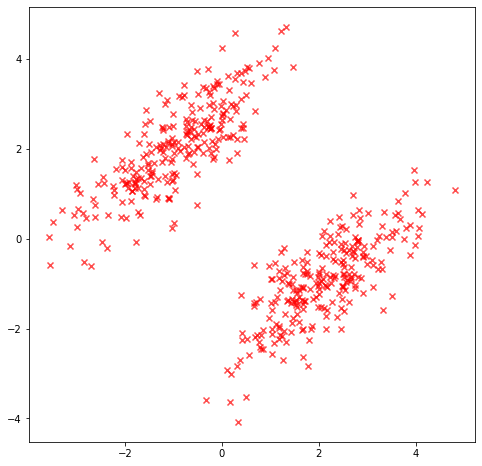

In [17]:
import matplotlib.pyplot as plt

# 散布図
plt.figure(figsize=(8, 8))
plt.scatter(X_2[:, 0], X_2[:, 1], 
            marker="x", alpha=0.7, c="r")

plt.show

In [18]:
X_2_train, X_2_test, y_2_train, y_2_test = scratch_train_test_split(X_2, y_2, train_size=0.8)

for name, model in dict_model.items():
  print("#####"+name+"#####")
  train2evaluate(X_2_train, X_2_test, y_2_train, y_2_test, model)
  print()

#####SGDClassifier#####
正解率:1.0
適合率:1.0
再現率:1.0
F値:1.0
混合行列
[[44  0]
 [ 0 56]]

#####SVC#####
正解率:1.0
適合率:1.0
再現率:1.0
F値:1.0
混合行列
[[44  0]
 [ 0 56]]

#####DecisionTreeClassifier#####
正解率:1.0
適合率:1.0
再現率:1.0
F値:1.0
混合行列
[[44  0]
 [ 0 56]]



In [19]:
# シンプルデータセット2
X_3 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y_3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<function matplotlib.pyplot.show(*args, **kw)>

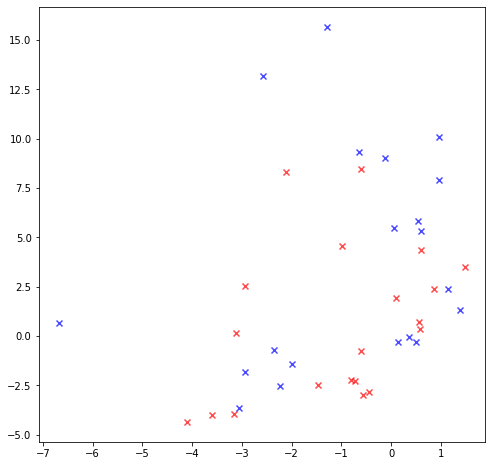

In [20]:
# 散布図
plt.figure(figsize=(8, 8))
plt.scatter(X_3[:20, 0], X_3[:20, 1], 
            marker="x", alpha=0.7, c="r")
plt.scatter(X_3[20:, 0], X_3[20:, 1], 
            marker="x", alpha=0.7, c="b")

plt.show

In [21]:
X_3_train, X_3_test, y_3_train, y_3_test = scratch_train_test_split(X_3, y_3, train_size=0.8)

for name, model in dict_model.items():
  print("#####"+name+"#####")
  train2evaluate(X_3_train, X_3_test, y_3_train, y_3_test, model)
  print()

#####SGDClassifier#####
正解率:0.375
適合率:0.43333333333333335
再現率:0.41666666666666663
F値:0.3650793650793651
混合行列
[[1 1]
 [4 2]]

#####SVC#####
正解率:0.5
適合率:0.6666666666666666
再現率:0.6666666666666666
F値:0.5
混合行列
[[2 0]
 [4 2]]

#####DecisionTreeClassifier#####
正解率:0.625
適合率:0.35714285714285715
再現率:0.4166666666666667
F値:0.3846153846153846
混合行列
[[0 2]
 [1 5]]



#### 回帰問題
回帰は1種類をスクラッチします。

- 線形回帰

線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。

[sklearn.linear_model.SGDRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

### 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [22]:
from sklearn.linear_model import SGDRegressor

In [24]:
df = pd.read_csv('train.csv')
df_select = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df_select.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 試験用関数の定義
def scale2evaluate(scaler, X_train, X_test, y_train, y_test, model):
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_train_scaled = np.log(y_train)
    model.fit(X_train_scaled, y_train_scaled)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test ,np.exp(y_pred))
    mae = mean_absolute_error(y_test ,np.exp(y_pred))
    r2 = r2_score(y_test ,np.exp(y_pred))
    print("平均二乗誤差(RMSE):{:e}({:e})".format((mse), np.sqrt(mse)))
    print("平均絶対誤差:{:e}".format(mae))
    print("決定係数:{}".format(r2))

In [58]:
sgd_r = SGDRegressor()
scaler = StandardScaler()

X_4 = df_select[['GrLivArea', 'YearBuilt']]
y_4 = df_select[['SalePrice']]

X_4_train, X_4_test, y_4_train, y_4_test = scratch_train_test_split(X_4, y_4, train_size=0.8)

scale2evaluate(scaler, X_4_train, X_4_test, y_4_train, y_4_test, sgd_r)

平均二乗誤差(RMSE):1.179966e+09(3.435064e+04)
平均絶対誤差:2.438438e+04
決定係数:0.7458888584755542


/home/timanishi/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
